## 딥러닝으로 시작하는 컴퓨터 비전
### 6. 심화된 CNN 구조

#### 6-1. 들어가며

![](./img06/01.png)

![](./img06/02.png)

#### 학습 내용

Inception Module(Naïve Version) - “GoogLeNet”

 - GoogLeNet의 구조와 장점을 살펴보며 Inception Module에 대해 알아봅시다. 또한, Inception Module(Naïve Version)을 직접 구현해 봅시다.

Inception Module(1 x 1 convolution) - “GoogLeNet”

 - 1 x 1 Filter의 연산을 이해하고 효과에 대해서 알아봅시다. 또한, 1 x 1 convolution 연산까지 적용한 Inception module을 직접 구현해 봅시다.

Skip Connection(ResNet)

 - ResNet의 구조를 살펴보며 skip connection을 사용했을 때 발생하는 효과에 대해서 알아봅시다.

#### 학습 목표

Inception Module의 특징을 설명할 수 있습니다.

1 x 1 convolution의 효과를 설명할 수 있습니다.

Skip connection을 통해서 얻을 수 있는 효과를 설명할 수 있습니다.

### 6-2. Inception Module (Naïve Version) “GoogLeNet”

![](./img06/img.png)

역전파에서 input 방향으로 error 전달이 잘 안되는 문제를 vanishing gradient problem이라고 한다.

![](./img06/img1.png)

붉은색 점선이 인셉션 모듈

인셉션 모듈은 1x1, 3x3, 5x5, max pooling을 통해 나온 결과를 concat해서 다음 레이어로 보낸다.

![](./img06/img2.png)

꼭 커널사이즈가 한가지로 고정될 필요는 없다. 피쳐맵 사이즈가 다 다르게 나오는데 이것을 concat 한다.

가장 옵티멀한 커널사이즈를 모르니 여러개를 다 써서 합치자.

![](./img06/img4.png)

original image 위로 kernal 위로 올리는 것을 over-ridding 이라고 한다

이렇게 over-ridding 해서 나타나는 영역을 receptive field라고 한다.

커널 사이즈가 작으면 detail한 정보를 얻을수 있으나 특징을 추출하는데 있어서 지나치게 지엽적인 특징을 얻게 된다.

커널 사이즈가 크면 오리지널 이미지가 가진 굵직굵직한 패턴을 확인 할 수 있다.

pooling을 통해 down sampling 의 효과도 얻음



![](./img06/img5.png)

여러개의 인셉션 모듈을 쌓는 방식

Q. GoogLeNet에서는 vanishing gradient의 문제를 해결하기 위해 어떤 방법을 사용했는지 설명해 보세요.

A. GoogLeNet에서는 Inception Module을 사용하여 vanishing gradient의 문제를 해결했습니다.

Q. GoogLeNet은 독특한 모델 구조를 가지고 있습니다. 이러한 GoogLeNet의 아이디어는 어떤 것이었는지 설명해 보세요.

• 왜 한 입력 image에 한 종류의 filter size만 적용해야 하는가?
• 뭐가 잘 될지 모르니 1 x 1, 3 x 3, 5 x 5, 3 x 3 max pooling을 다 해보자!
• 큰 사이즈의 Receptive Field가 제공하는 장점(큰 특징 추출, 연산이 빠름)은 수용하면서 파라미터의 수를 줄일 수 있는 구조를 만들자.

적절한 커널의 필터 사이즈와 Pooling(down sampling)을 고민해서 찾아내기보다는 여러 사이즈의 필터들을 한꺼번에 결합하는 방식을 제공하였고, 논문(Going deeper with convolutions)에서는 이를 Inception module로 지칭하였습니다.

Q. GoogLeNet은 Inception module끼리 어떻게 연결되게 만들어 주는 지 설명해 보세요. 또한, 여러 개의 Inception module을 연결했을 때의 장점에 대해서 설명해 보세요.

GoogLeNet은 Inception module들을 Pooling을 통해 연속적으로 이어서 구성되었습니다. 여러 사이즈의 필터들이 서로 다른 공간 기반으로 Feature들을 추출하고, 이를 결합하면서 보다 풍부한 Feature Extractor layer의 구성이 가능합니다.

#### Naïve Inception module from scratch

인셉션 모듈을 만드는 데 필요한 라이브러리를 불러옵니다.

In [22]:
# 인셉션 모듈을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

Naïve Inception 모델을 만들어봅시다.

In [23]:
# Naïve Inception 블록을 만들기 위한 함수
def naive_inception(input_layer, conv1_filter, conv3_filter, conv5_filter):
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)


    # Q. 3x3 사이즈의 kernel을 이용한 convolution2d layer를 만들어 보세요.
    conv3 = keras.layers.Conv2D(conv3_filter, (3,3), padding='same', activation='relu')(input_layer)

    # Q. 5x5 사이즈의 kernel을 이용한 convolution2d layer를 만들어 보세요.
    conv5 = keras.layers.Conv2D(conv5_filter, (5,5), padding='same', activation='relu')(input_layer)


    # 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    # 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

input layer를 정의해주고, naïve Inception 블록도 하나 생성합니다.

In [24]:
input_data = keras.layers.Input(shape=(256, 256, 3))
naive_inception_out = naive_inception(input_data, 64, 128, 32)

In [25]:
print(naive_inception_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 227), dtype=tf.float32, name=None), name='concatenate_2/concat:0', description="created by layer 'concatenate_2'")


input layer와 naïve Inception 블록을 연결해서 모델을 만듭니다.

In [26]:
# 모델 만들기
model = keras.models.Model(inputs=input_data, outputs=naive_inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 256, 256, 64)         256       ['input_5[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 256, 256, 128)        3584      ['input_5[0][0]']             
                                                                                                  
 conv2d_13 (Conv2D)          (None, 256, 256, 32)         2432      ['input_5[0][0]']             
                                                                                            

tensorflow.keras.utils 라이브러리의 plot_model 함수로 모델의 구조를 시각화할 수 있습니다.

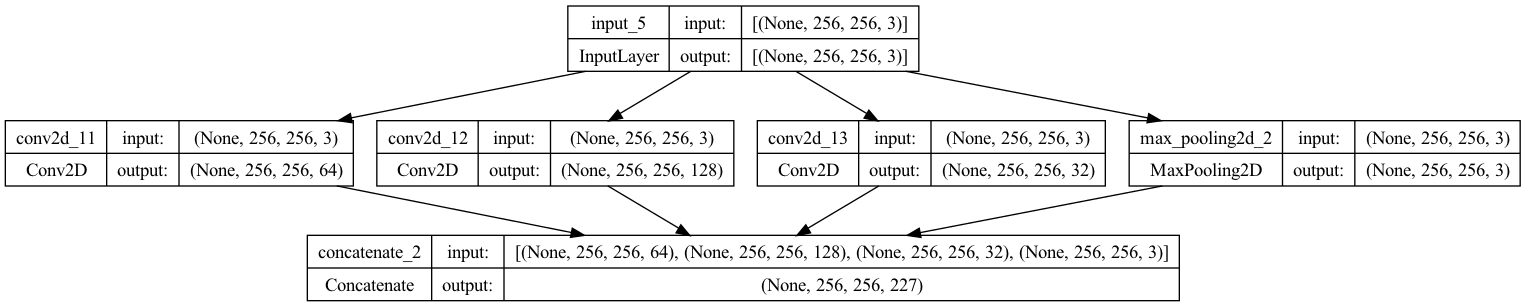

In [27]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

#### 6-3. Inception Module (1x1 convolution) “GoogLeNet”

![](./img06/img6.png)

하나의 input tensor가 들어왔다.(1차원은 벡터, 2차원은 매트릭스, 3차원은 텐서라 부름)

7*7의 depth가 아주 깊은 텐서가 들어왔다. 이것을 1*1* 동일 depth 의 커널을 가진 필터를 통해 1*1의 depth를 가진 텐서로 바꿔준다.
(input의 채널수와 filter의 채널수가 같아야 한다. 참고. filter의 개수와 output의 채널수(feature map 개수)가 같다와 다른 의미)

예시 7*7*10 텐서가 들어왔다. 1*1*10 필터를 통해 7*7*1 텐서로 바꿔준다.
(가로 세로는 동일한데 10개의 채널이 1개로 줄어든다)

![](./img06/img7.png)

연산량은 찾아야 하는 값의 개수

우리가 모르는 찾아야 하는 값의 개수는 커널안에 들어가는 값과 아웃풋에 들어가는 값을 모른다.

그래서 커널의 연산량 5*5*480과 아웃풋에 들어가는 값 14*14*48을 곱해준다.

여기서 padding을 통해 5*5 필터를 거쳐도 14*14가 나온다고 가정한다.

![](./img06/img8.png)

한번 컨볼루션 할것을 위 그림과 같이 2번 컨볼루션 하면 연산량이 줄어든다.

앞서 연산량은 112.9M 이었는데 2번 컨볼루션 하여 5.3M으로 줄어들었다.

보통 컨볼루션과 Relu를 한번에 한다. 그래서 2번 컨볼루션을 하면 2번 Relu를 해야한다. 이를 통해 비선형성이 강화된다.

![](./img06/img9.png)

1*1 컨볼루션을 통해 연산량을 줄이고 비선형성을 강화시킨다.

앞의 예제에서 확인했던 3*3, 5*5, pooling에 모두 1*1 컨볼루션을 적용함

![](./img06/img10.png)

FC는 Fully Connected layer를 의미한다.

Global Average Pooling은 전체 피쳐맵의 평균을 구하는 것으로 별도 파라미터가 필요하지 않다.

![](./img06/img11.png)

구조가 깊으면 vanishing gradient 문제가 발생한다.

역전파시 아웃풋과 가까운 쪽은 error back propagation이 잘 되지만 input 쪽으로 갈수록 error가 잘 전달되지 않는다.

이것을 vanishing gradient 문제라고 한다.

중간에 에러를 전달할 수 있는 구조를 만든다면 vanishing gradient 문제를 해결할 수 있다.

구글넷을 만든 사람들은 Auxiliary classifier를 만들어서 중간에 에러를 전달할 수 있는 구조를 만들었다.(가짜분류기)

붉은색으로 표기된 가짜 분류기를 통해 순전파때 나온 loss 값을 가지고 역전파를 해서 파라미터 업데이트를 한다.

강제로 에러를 만들어낸다는 컨셉

가짜 분류기에서 나온 값이 모델이 너무 많은 영향을 끼치면 안되기 때문에 0.3을 곱해주며 predict를 할때는 영향을 끼치지 않고 trainig 할때만 영향을 끼친다.

Q. Depth가 깊은 Input tensor에 동일한 channel 수를 가진 1 x 1 filter를 conv2D 연산을 하면 feature map의 channel이 어떻게 되는지 설명해 보세요. 1 x 1 Filter을 사용했을 때의 장점에 대해서 설명해 보세요.

Depth가 깊은 Input tensor에 동일한 channel 수를 가진 1 x 1 filter를 conv2D 연산을 하면 feature map의 channel이 1이 됩니다. 즉 10개의 channel을 1개의 channel로 압축시킵니다.

1 x 1 filter를 사용하면 channel 수를 줄이기 때문에 연산량도 감소하고, 활성화 함수를 2번 사용하여 비선형성을 강화시킨다는 장점이 있습니다.

Q. GoogLeNet에서는 Inception Module 이후, Global Average Pooling을 사용했습니다. Global Average Pooling이 무엇인지 설명해 보세요.

Global Average Pooling은 전체 featuremap의 평균값을 뽑아 pooling을 한 것을 의미합니다. 또한, Global Average Pooling은 parameter가 추가로 필요하지 않습니다.

Q. 엄청나게 깊은 네트워크에서 vanishing gradient 문제가 발생합니다. 이 문제를 해결하기 위해 GoogLeNet을 만든 사람들은 Auxiliary classifier를 모델에 덧붙였습니다. Auxiliary classifier을 통해서 가질 수 있는 효과에 대해서 설명해 보세요.

Auxiliary classifier를 모델에 2개를 붙여 결과적으로 loss를 맨 끝뿐만 아니라 중간에서도 구하기 때문에 기울기를 역전파 시킬 수 있었습니다.

대신 결과에 지나치게 영향을 주는 것을 막기 위해 auxiliary classifier의 loss에는 0.3을 곱하였습니다. 그리고 실제로 테스트하는 과정에서는 auxiliary classifier를 제거하고, 맨 끝의 softmax만을 사용하였습니다.

#### Inception module with 1x1 convolution

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu6-8.max-800x600.png)

Inception module을 만드는 데 필요한 라이브러리를 불러옵니다.

In [28]:
# 인셉션 모듈을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

이번 스텝에서는 조금 더 복잡한 Inception 블록을 구현해 보겠습니다.

In [29]:
# Inception 블록을 만들기 위한 함수
def inception(input_layer, conv1_filter, conv3_in, conv3_out, conv5_in, conv5_out, pooling_out):
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)
    # 3x3 사이즈의 kernel을 이용한 convolution2d layer
    conv3 = keras.layers.Conv2D(conv3_in, (1,1), padding='same', activation='relu')(input_layer) # Naive 버전과 가장 차별화되는 부분: 1x1 convolution
    conv3 = keras.layers.Conv2D(conv3_out, (3,3), padding='same', activation='relu')(conv3)


    # Q. 5x5 사이즈의 kernel을 이용한 convolution2d layer 를 만들어 보세요.
    conv5 = keras.layers.Conv2D(conv5_in, (1,1), padding='same', activation='relu')(input_layer) # Naive 버전과 가장 차별화되는 부분: 1x1 convolution


    # 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    pool = keras.layers.Conv2D(pooling_out, (1,1), padding='same', activation='relu')(pool)
    # 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

input layer를 정의하고 Inception 블록을 생성합니다.

In [30]:
input_data = keras.layers.Input(shape=(256, 256, 3))
inception_out = inception(input_data, 64, 96, 128, 16, 32, 32)

In [31]:
print(inception)

<function inception at 0x7fa089b269e0>


input layer와 Inception 블록을 연결해서 모델을 만듭니다.

In [32]:
# 모델 만들기
model = keras.models.Model(inputs=input_data, outputs=inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 256, 256, 96)         384       ['input_6[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 256, 256, 3)          0         ['input_6[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d_14 (Conv2D)          (None, 256, 256, 64)         256       ['input_6[0][0]']       

plot_model 함수로 모델의 구조를 시각화합니다.

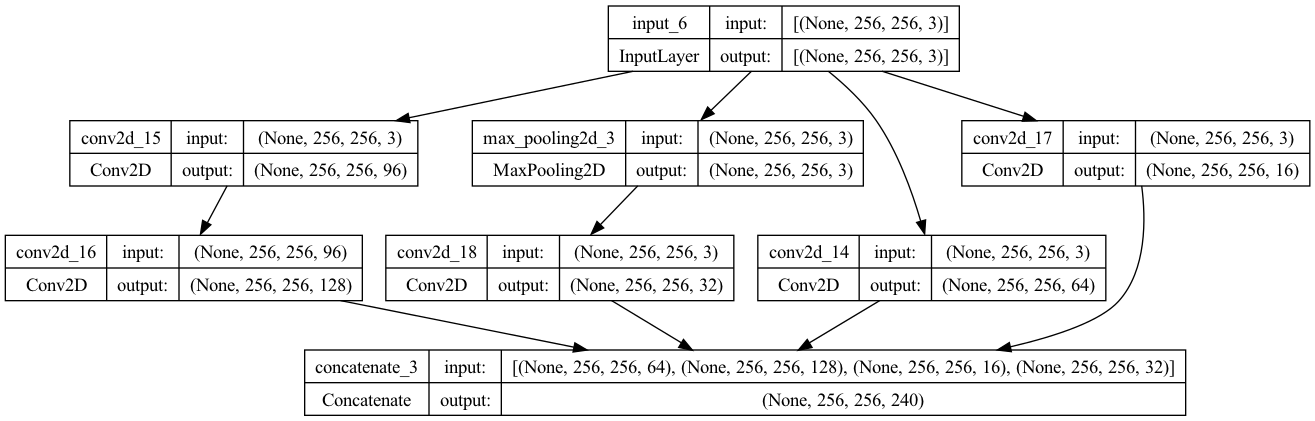

In [ ]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, to_file='inception.png')

#### 6-4. Skip Connection (ResNet)

![](./img06/img12.png)

![](./img06/img13.png)

VGG19에 비하여 훨씬 많은 layer를 가지고 있다.

skip connection을 통해 vanishing gradient 문제를 해결하는 것을 residual learning 이라고 한다.

![](./img06/img14.png)

residual은 순전파때 2가지 경로를 통해 나온 결과를 더한다. 이때 입력값이 그대로 더해지게 되는데 이것을 identity mapping이라고 한다.

back propagation시에 loss 값은 두번의 error back propagation을 통해 파라미터가 업데이트 된다.

이때 identity mapping을 통해 나온 값은 그대로 더해지기 때문에 error back propagation시에도 그대로 전달된다.

이것을 통해 error가 그대로 전달되기 때문에 gradient flow(error의 전달 흐름)가 원할하게 이루어진다.

![](./img06/img15.png)

노란색이 커널

Q. GoogLeNet은 Vanishing gradient의 문제를 해결하기 위해 Inception Module을 사용했습니다. ResNet은 어떤 것을 사용해서 이 문제를 해결하려고 했는지 설명해 보세요.

레이어가 깊어지면서 생기는 Vanishing gradient 문제를 해결하기 위해 ResNet은 skip connection을 사용하였습니다. skip connection을 통해 학습하는 것을 residual learning이라고 합니다.

Q. Residual Learning: Skip Connection을 통해서 얻을 수 있는 것은 무엇인지 설명해 보세요.

Residual Learning은 일정 시점마다 input x 자체를 skip connection을 통해 연결합니다. 이로 인해 backpropagation을 할 때 Identitiy mapping을 통해 loss 값이 변함 없이 전달되기 때문에 Gradient flow가 원활하게 이루어집니다. 따라서 모델을 깊게 쌓는 것에 대한 부담이 줄어듭니다.

그래서 Vanishing gradient의 문제를 해결할 수 있어 Skip Connection을 gradient “highway”라고 부르기도 합니다.

#### skip connection 코드 살펴보기

먼저 필요한 라이브러리를 불러옵니다.

In [ ]:
# 모델을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

skip connection이 구현된 함수 residual_module을 정의합니다.

residual_module을 정의할 때 주의점은 skip connection을 구성하기 위해서 connection을 통해서 합해지는 feature map들의 가로x세로x채널 사이즈가 맞아야 한다는 것입니다.

In [ ]:
def residual_module(input_layer, n_filters):
	merge_input = input_layer

# if문에서는 채널 사이즈가 동일한지 확인하고, 만일 동일하지 않다면 1x1 convolution을 통해서 채널 사이즈를 맞춰 준다.
	if input_layer.shape[-1] != n_filters:
		merge_input = keras.layers.Conv2D(n_filters, (1,1), padding='same', activation='relu')(input_layer) # n_filter로 채널 사이즈를 맞춰 준다.
	# Conv2D layer
	conv1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='relu')(input_layer)
	# Conv2D layer
	conv2 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='linear')(conv1)

  # Add를 통해서 skip connection을 구현하는 부분
	out_layer = keras.layers.Add()([conv2, merge_input])
	out_layer = keras.layers.Activation('relu')(out_layer)

	return out_layer

input layer를 정의하고 residual module을 생성합니다.

In [35]:
input = keras.layers.Input(shape=(256, 256, 3))
residual_out = residual_module(input, 64)

In [37]:
print(residual_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 64), dtype=tf.float32, name=None), name='activation_1/Relu:0', description="created by layer 'activation_1'")


input layer와 residual module을 연결해서 모델을 만듭니다.

In [38]:
model = keras.models.Model(inputs=input, outputs=residual_out)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 256, 256, 64)         1792      ['input_7[0][0]']             
                                                                                                  
 conv2d_21 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_20[0][0]']           
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 64)         256       ['input_7[0][0]']             
                                                                                            

plot_model 함수로 모델의 구조를 시각화합니다.

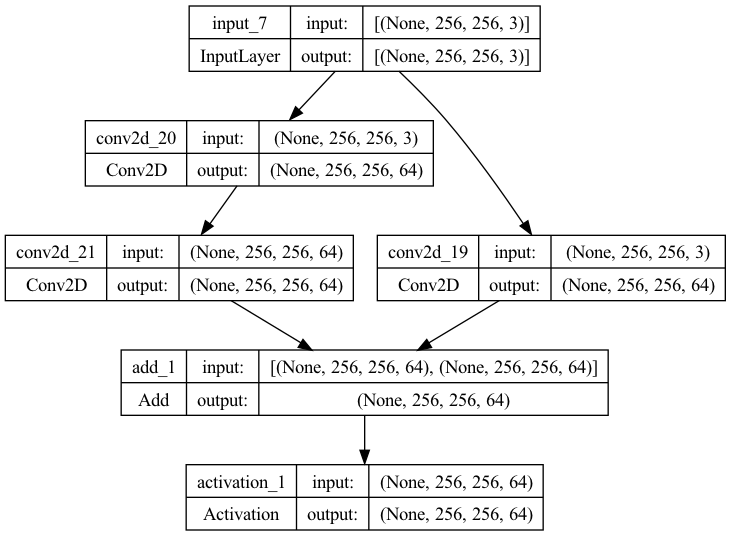

In [39]:
plot_model(model, show_shapes=True, to_file='residual_module.png')

#### 6-5. 마무리하며

![](./img06/img16.png)

Q. 심화된 CNN 구조의 핵심은 어떤 것이며 이를 통해 발생할 수 있는 문제는 어떤 것이 있었는지 설명해 보세요.

심화된 CNN 모델의 핵심은 모델의 깊이를 늘이는 데에 있습니다. 깊이를 늘리는 데 가장 큰 문제는 Vanishing gradient입니다. 따라서 Vanishing gradient를 해결할 수 있는 구조를 만드는 것이 CNN 모델 발전의 핵심입니다.

Q. Skip connection을 모델에 적용하면 어떤 효과를 주는지 설명해 보세요.

Skip connection은 깊은 모델에서 error backpropagation이 원활하게 이루어지도록 만듭니다. 그래서 skip Connection을 gradient “highway”라고 부르기도 합니다.